In [2]:
import sys
import numpy as np
import dill
import matplotlib.pyplot as plt
%matplotlib inline

import coremagmodels as cm

sys.path.append('../')
import coreflows as cf
sf = cf.advect.SteadyFlow()
wv = cf.advect.Waves()

# Test Advection of Magnetic Field

## Create background magnetic field

In [3]:
magmod = cm.models.Chaos6()
T_start = 2001
T_end = 2015
l_max = 14
Nth = 60
th, ph = magmod.get_thvec_phvec_DH(l_max=l_max)
Nt = (T_end-T_start)*3
T = np.linspace(T_start, T_end, Nt)

In [4]:
# Import steady flows
filename = '../coreflows/data/steady_flow_fortran_fit'
th_sf,ph_sf,vth_sf,vph_sf = sf.import_fortran_flow_DH(filename)
vth_sfSH = sf.v2vSH(vth_sf)
vph_sfSH = sf.v2vSH(vph_sf)

In [5]:
# Import and create analytic waves 
data = dill.load(open('../coreflows/data/wavefits012.p','rb'))
c012 = data['c012']
f012 = data['f012']

/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


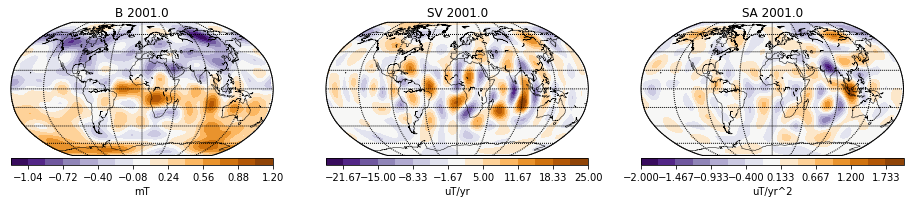

In [6]:
# compute magnetic field data over timeframe
B_lmax = 14

th, ph = magmod.get_thvec_phvec_DH(Nth)

Bsh = magmod.get_sht_allT(T, l_max = B_lmax)
B = magmod.B_sht_allT(Bsh, Nth=Nth, l_max=B_lmax)
_, dthB, dphB = magmod.gradB_sht_allT(Bsh, Nth=Nth, l_max=B_lmax)

SVsh = magmod.get_SVsht_allT(T, l_max=B_lmax)
SV = magmod.B_sht_allT(SVsh, Nth=Nth, l_max=B_lmax)
_, dthSV, dphSV = magmod.gradB_sht_allT(SVsh, Nth=Nth, l_max=B_lmax)

SAsh = magmod.get_SAsht_allT(T, l_max=B_lmax)
SA = magmod.B_sht_allT(SAsh, Nth=Nth, l_max=B_lmax)
_, dthSA, dphSA = magmod.gradB_sht_allT(SAsh, Nth=Nth, l_max=B_lmax)


i = 0
plt.figure(figsize=(16,8))
plt.subplot(131)

cm.plot.contourf_DH(B[i,:,:]/1e6, newfig=False, title='B {}'.format(T[i]), clbl='mT',zmax=1.2)
plt.subplot(132)
cm.plot.contourf_DH(SV[i,:,:]/1e3, newfig=False, title='SV {}'.format(T[i]), clbl='uT/yr',zmax=25)
plt.subplot(133)
cm.plot.contourf_DH(SA[i,:,:]/1e3, newfig=False, title='SA {}'.format(T[i]), clbl='uT/yr^2',zmax=2.)

/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


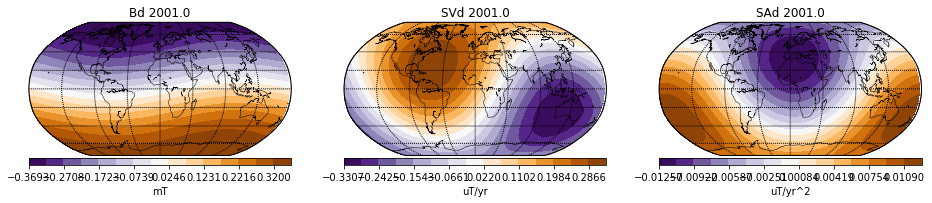

In [13]:
# compute magnetic field data over timeframe
Bd_lmax = 1

th, ph = magmod.get_thvec_phvec_DH(Nth)

Bdsh = magmod.get_sht_allT(T, l_max = Bd_lmax)
Bd = magmod.B_sht_allT(Bdsh, Nth=Nth, l_max=Bd_lmax)
_, dthBd, dphBd = magmod.gradB_sht_allT(Bdsh, Nth=Nth, l_max=Bd_lmax)

SVdsh = magmod.get_SVsht_allT(T, l_max=Bd_lmax)
SVd = magmod.B_sht_allT(SVdsh, Nth=Nth, l_max=Bd_lmax)
_, dthSVd, dphSVd = magmod.gradB_sht_allT(SVdsh, Nth=Nth, l_max=Bd_lmax)

SAdsh = magmod.get_SAsht_allT(T, l_max=Bd_lmax)
SAd = magmod.B_sht_allT(SAdsh, Nth=Nth, l_max=Bd_lmax)
_, dthSAd, dphSAd = magmod.gradB_sht_allT(SAdsh, Nth=Nth, l_max=Bd_lmax)
i = 0
plt.figure(figsize=(16,8))
plt.subplot(131)

cm.plot.contourf_DH(Bd[i,:,:]/1e6, newfig=False, title='Bd {}'.format(T[i]), clbl='mT')
plt.subplot(132)
cm.plot.contourf_DH(SVd[i,:,:]/1e3, newfig=False, title='SVd {}'.format(T[i]), clbl='uT/yr')
plt.subplot(133)
cm.plot.contourf_DH(SAd[i,:,:]/1e3, newfig=False, title='SAd {}'.format(T[i]), clbl='uT/yr^2')

## SV and SA from Steady Flow

/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


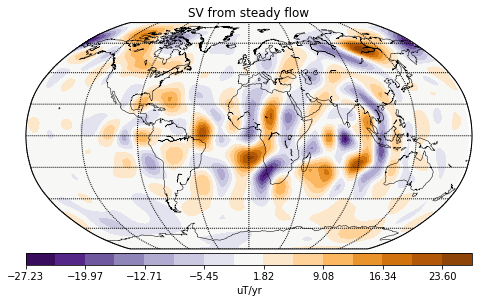

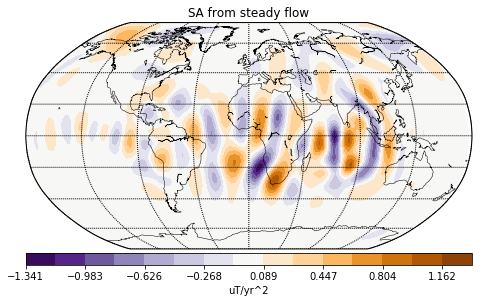

In [8]:
steadyflow_lmax = 14
SV_steadyflow = sf.SV_steadyflow_allT(vth_sfSH, vph_sfSH, Bsh, magmodel=magmod, Nth=Nth, B_lmax=B_lmax, v_lmax=steadyflow_lmax)
SV_resid = SV-SV_steadyflow

SA_steadyflow = sf.SA_steadyflow_allT(vth_sfSH, vph_sfSH, SVsh, magmodel=magmod, Nth=Nth, B_lmax=B_lmax, v_lmax=steadyflow_lmax)
SA_resid = SA- SA_steadyflow

cm.plot.contourf_DH(SV_steadyflow[0,:,:]/1e3, title='SV from steady flow', clbl='uT/yr')
cm.plot.contourf_DH(SA_steadyflow[0,:,:]/1e3, title='SA from steady flow', clbl='uT/yr^2')

## Simulated Wave SA and SV

/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecat

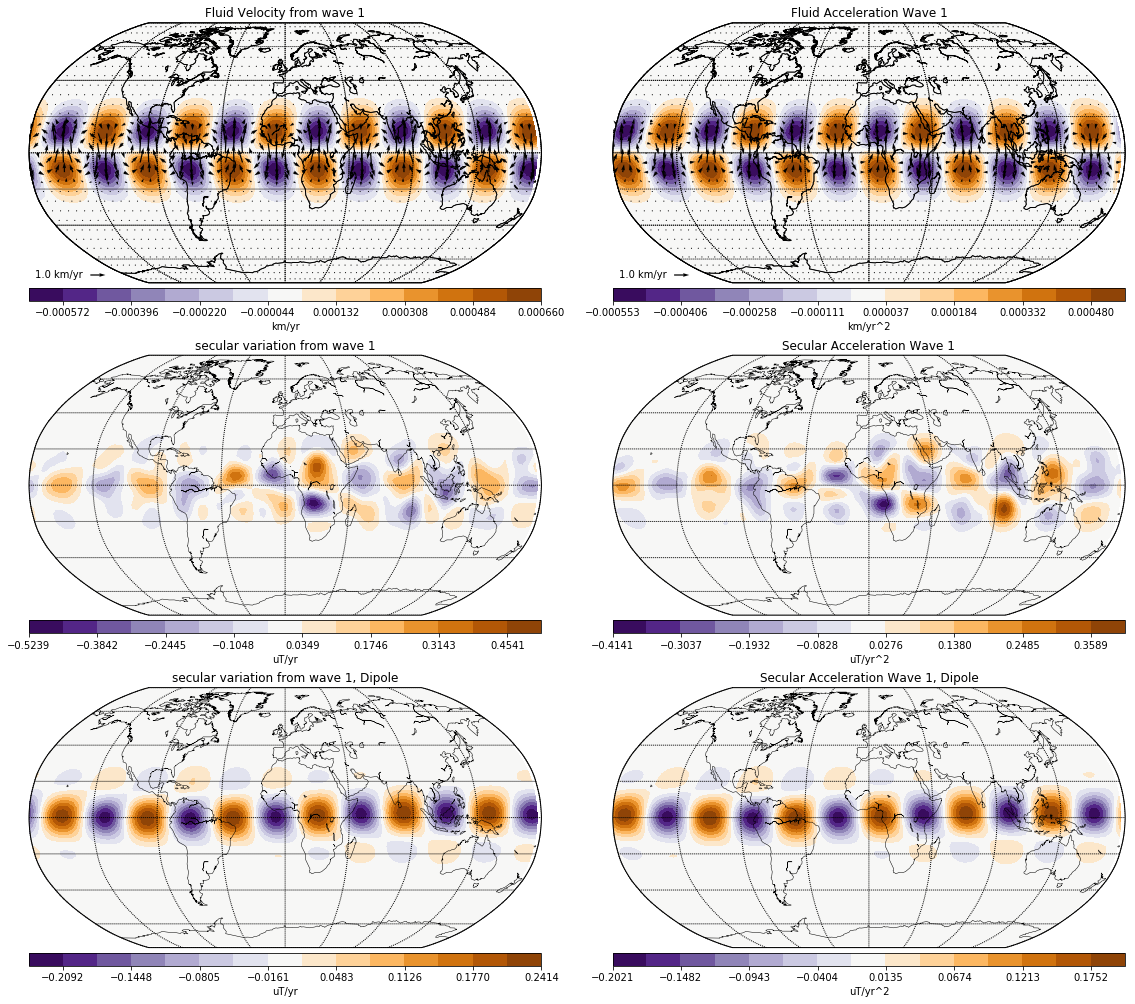

In [18]:
l_w1 = 0
m_w1 = 6
delta_th_w1 = 8
phase_w1 = 120
period_w1 = 7.5
vmax_w1 = 1.5 #km/yr
vw1th, vw1ph, aw1th, aw1ph = wv.vel_accel_wave_allT(l_w1, m_w1, T, delta_th_w1, c012, Nth, phase_w1, period_w1, vmax=vmax_w1)
divvw1 = wv.div_allT(vw1th, vw1ph)
divaw1 = wv.div_allT(aw1th, aw1ph)
SVw1 = wv.SV_wave_allT(B, dthB, dphB, vw1th, vw1ph, divvw1)
SAw1 = wv.SA_wave_fluidaccel_allT(B, dthB, dphB, aw1th, aw1ph, divaw1)
SAw1 += wv.SA_wave_magSV_allT(SV, dthSV, dphSV, vw1th, vw1ph, divvw1)
SAdw1 = wv.SA_wave_fluidaccel_allT(Bd, dthBd, dphBd, aw1th, aw1ph, divaw1)
SVdw1 = wv.SV_wave_allT(Bd, dthBd, dphBd, vw1th, vw1ph, divvw1)

plt.figure(figsize=(16,14))
i = -1
qarr_scale_mod = 1e-6
dq = 2
plt.subplot(321)
cm.plot.contourf_DH(divvw1[i,:,:], clbl='km/yr', newfig=False)
cm.plot.base_quiver(vw1th[i,::dq,::dq], vw1ph[i,::dq,::dq], newfig=False, qarr_scale_mod=qarr_scale_mod, qkey=1., title='Fluid Velocity from wave 1',)
plt.subplot(322)
cm.plot.contourf_DH(divaw1[i,:,:], clbl='km/yr^2', newfig=False)
cm.plot.base_quiver(aw1th[i,::dq,::dq], aw1ph[i,::dq,::dq], newfig=False, qarr_scale_mod=qarr_scale_mod, qkey=1., title='Fluid Acceleration Wave 1', )

plt.subplot(323)
cm.plot.contourf_DH(SVw1[i,:,:]/1e3, title='secular variation from wave 1', clbl='uT/yr', newfig=False)
plt.subplot(324)
cm.plot.contourf_DH(SAw1[i,:,:]/1e3, title='Secular Acceleration Wave 1', clbl='uT/yr^2', newfig=False)

plt.subplot(325)
cm.plot.contourf_DH(SVdw1[i,:,:]/1e3, title='secular variation from wave 1, Dipole', clbl='uT/yr', newfig=False)
plt.subplot(326)
cm.plot.contourf_DH(SAdw1[i,:,:]/1e3, title='Secular Acceleration Wave 1, Dipole', clbl='uT/yr^2', newfig=False)
plt.tight_layout()

/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecat

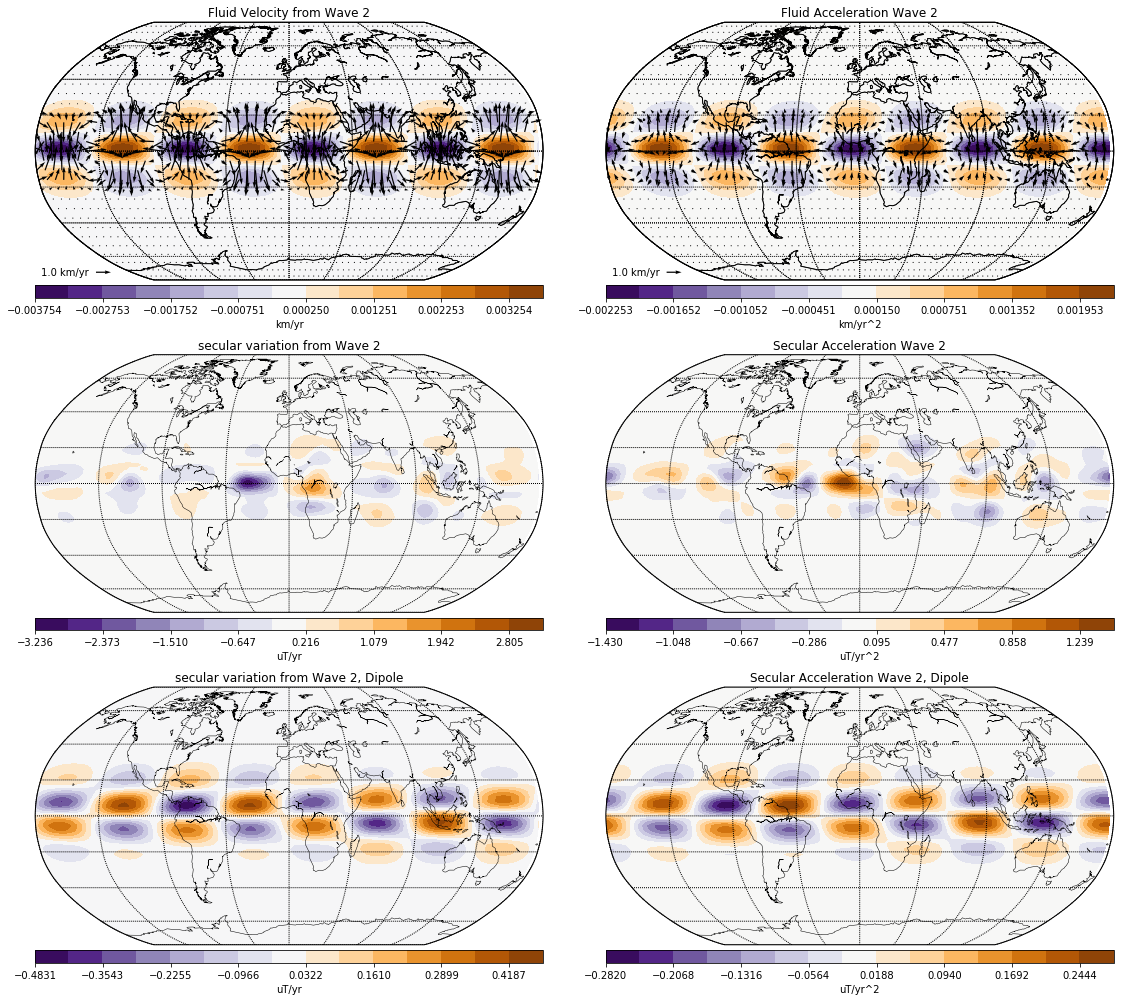

In [21]:
l_w2 = 1
m_w2 = 4
delta_th_w2 = 8
phase_w2 = 220
period_w2 = 10.5
vmax_w2 = 2
vw2th, vw2ph, aw2th, aw2ph = wv.vel_accel_wave_allT(l_w2, m_w2, T, delta_th_w2, c012, Nth, phase_w2, period_w2, vmax=vmax_w2)
divvw2 = wv.div_allT(vw2th, vw2ph)
divaw2 = wv.div_allT(aw2th, aw2ph)
SVw2 = wv.SV_wave_allT(B, dthB, dphB, vw2th, vw2ph, divvw2)
SAw2 = wv.SA_wave_fluidaccel_allT(B, dthB, dphB, aw2th, aw2ph, divaw2)
SAw2 += wv.SA_wave_magSV_allT(SV, dthSV, dphSV, vw2th, vw2ph, divvw2)
SAdw2 = wv.SA_wave_fluidaccel_allT(Bd, dthBd, dphBd, aw2th, aw2ph, divaw2)
SVdw2 = wv.SV_wave_allT(Bd, dthBd, dphBd, vw2th, vw2ph, divvw2)


plt.figure(figsize=(16,14))
i = -1
dq = 2
qarr_scale_mod = 1e-6
plt.subplot(321)
cm.plot.contourf_DH(divvw2[i,:,:], clbl='km/yr', newfig=False)
cm.plot.base_quiver(vw2th[i,::dq,::dq], vw2ph[i,::dq,::dq], newfig=False, qarr_scale_mod=qarr_scale_mod, qkey=1., title='Fluid Velocity from Wave 2')
plt.subplot(322)
cm.plot.contourf_DH(divaw2[i,:,:], clbl='km/yr^2', newfig=False)
cm.plot.base_quiver(aw2th[i,::dq,::dq], aw2ph[i,::dq,::dq], newfig=False, qarr_scale_mod=qarr_scale_mod, qkey=1., title='Fluid Acceleration Wave 2')

plt.subplot(323)
cm.plot.contourf_DH(SVw2[i,:,:]/1e3, title='secular variation from Wave 2', clbl='uT/yr', newfig=False)
plt.subplot(324)
cm.plot.contourf_DH(SAw2[i,:,:]/1e3, title='Secular Acceleration Wave 2', clbl='uT/yr^2', newfig=False)
plt.tight_layout()

plt.subplot(325)
cm.plot.contourf_DH(SVdw2[i,:,:]/1e3, title='secular variation from Wave 2, Dipole', clbl='uT/yr', newfig=False)
plt.subplot(326)
cm.plot.contourf_DH(SAdw2[i,:,:]/1e3, title='Secular Acceleration Wave 2, Dipole', clbl='uT/yr^2', newfig=False)
plt.tight_layout()